Problem statement:
- Delivery_time -> Predict delivery time using sorting time
- Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline
sns.set_theme(style='darkgrid',palette='turbo_r')
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Delivery_time.csv')

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

<Axes: >

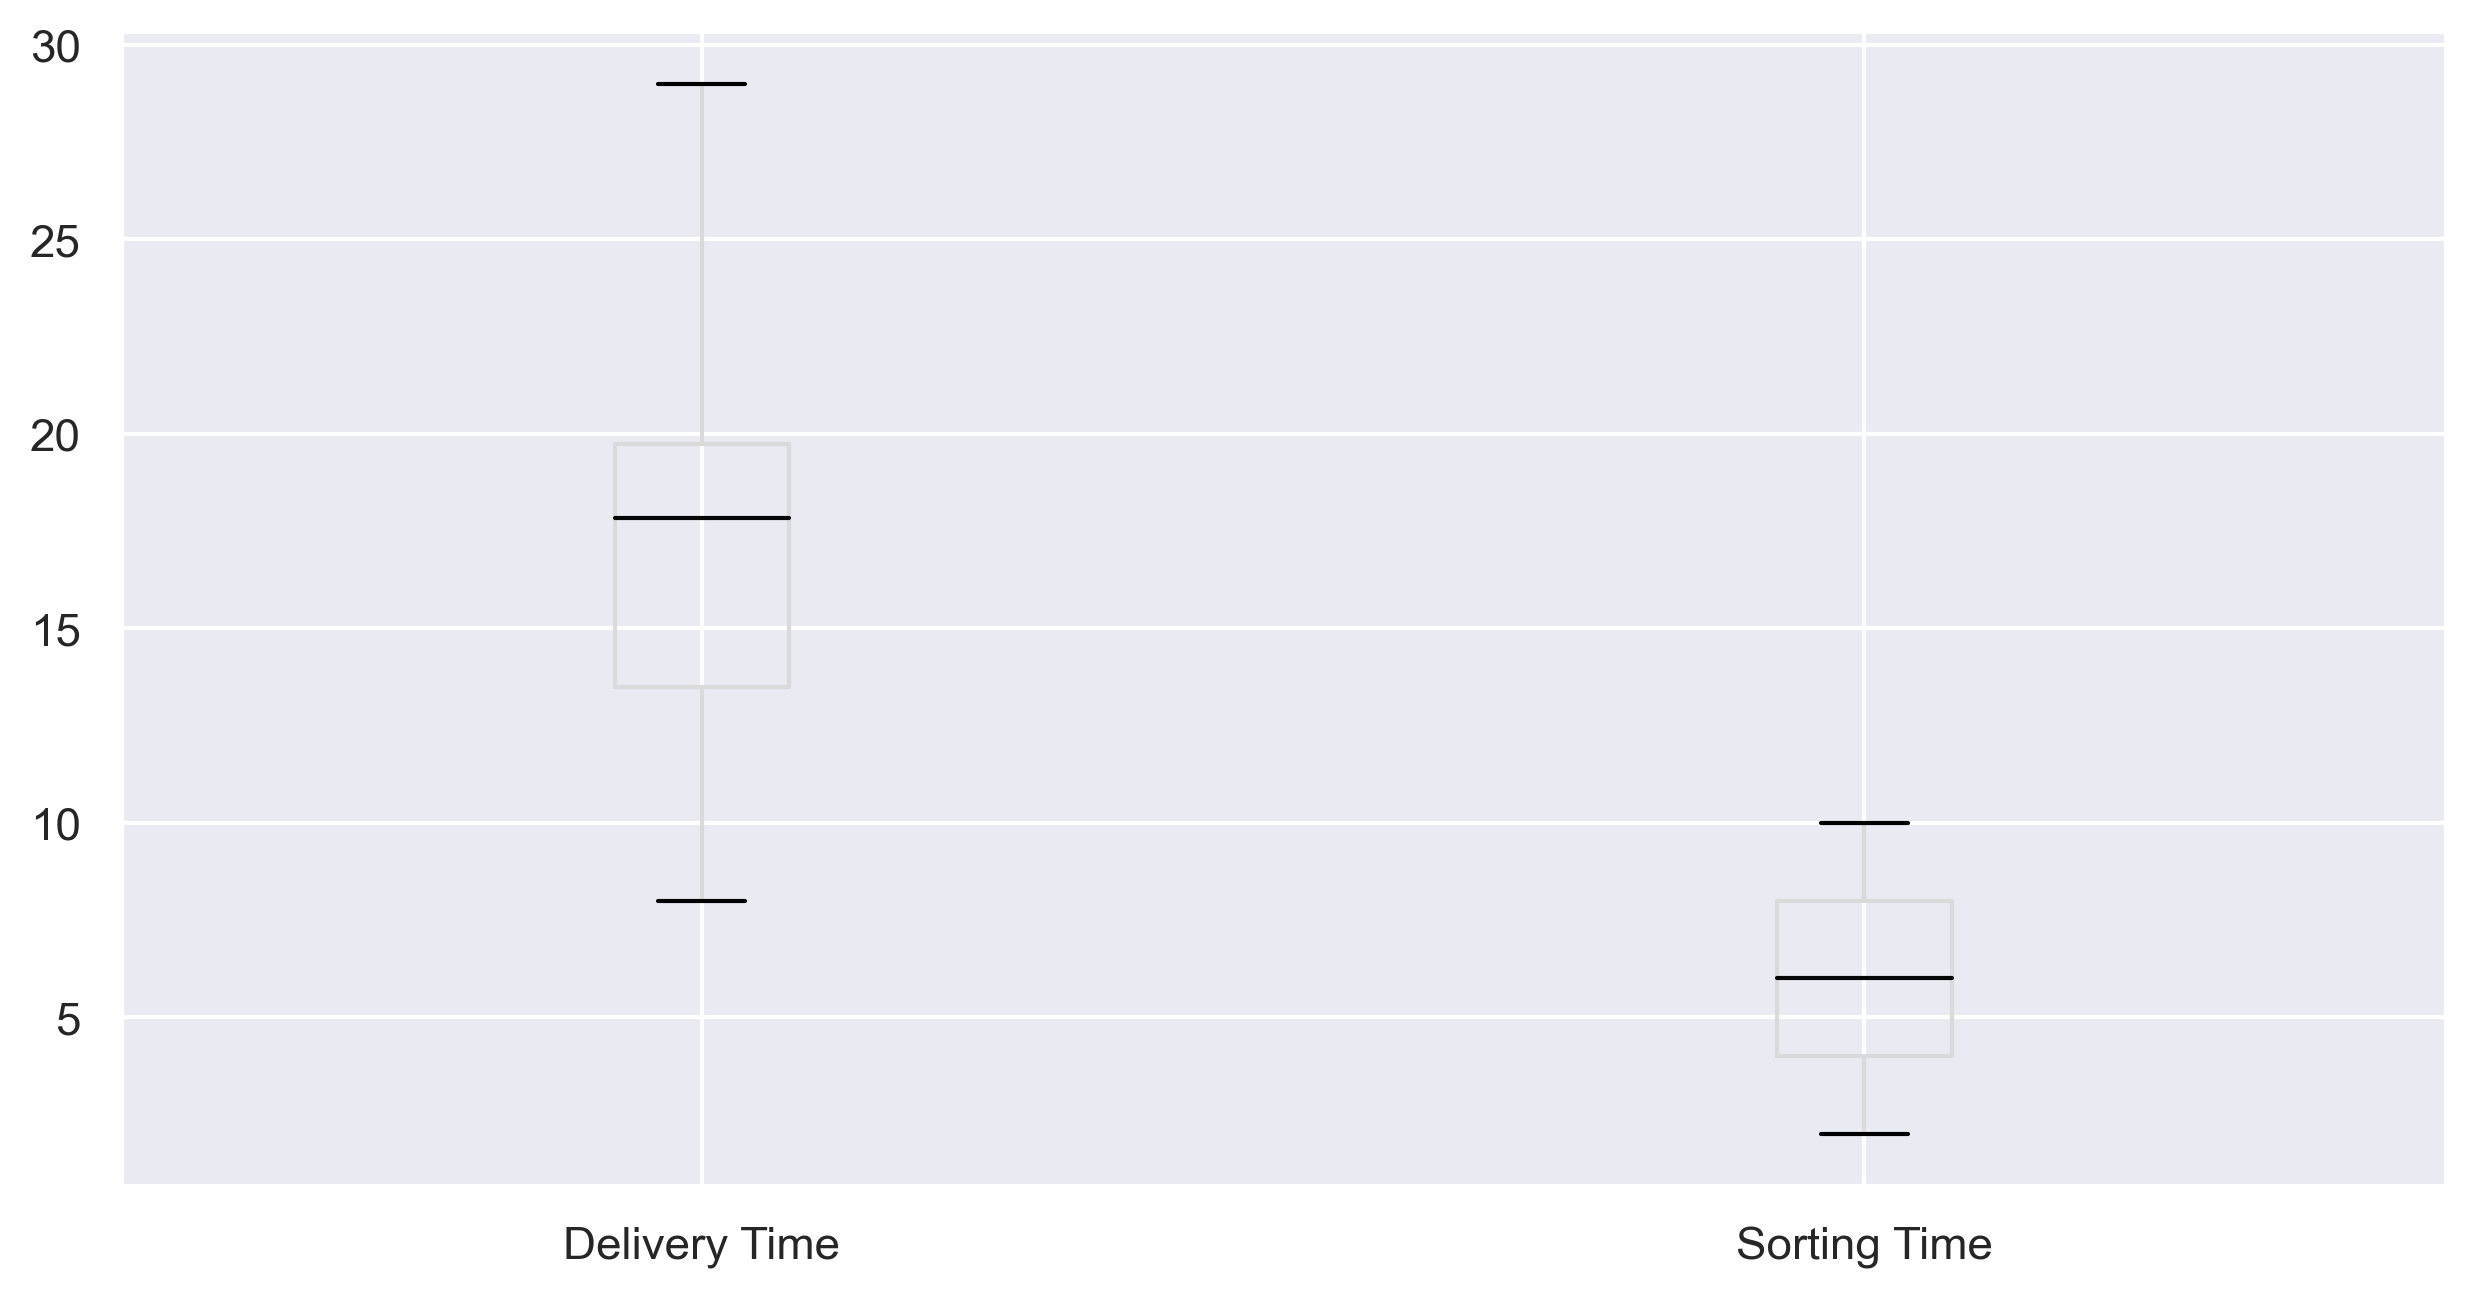

In [5]:
df.boxplot()#no outlier 

In [6]:
df[df.duplicated()]#no duplicates

,Delivery Time,Sorting Time


In [7]:
df.isnull().sum()#no null values

Delivery Time    0
Sorting Time     0
dtype: int64

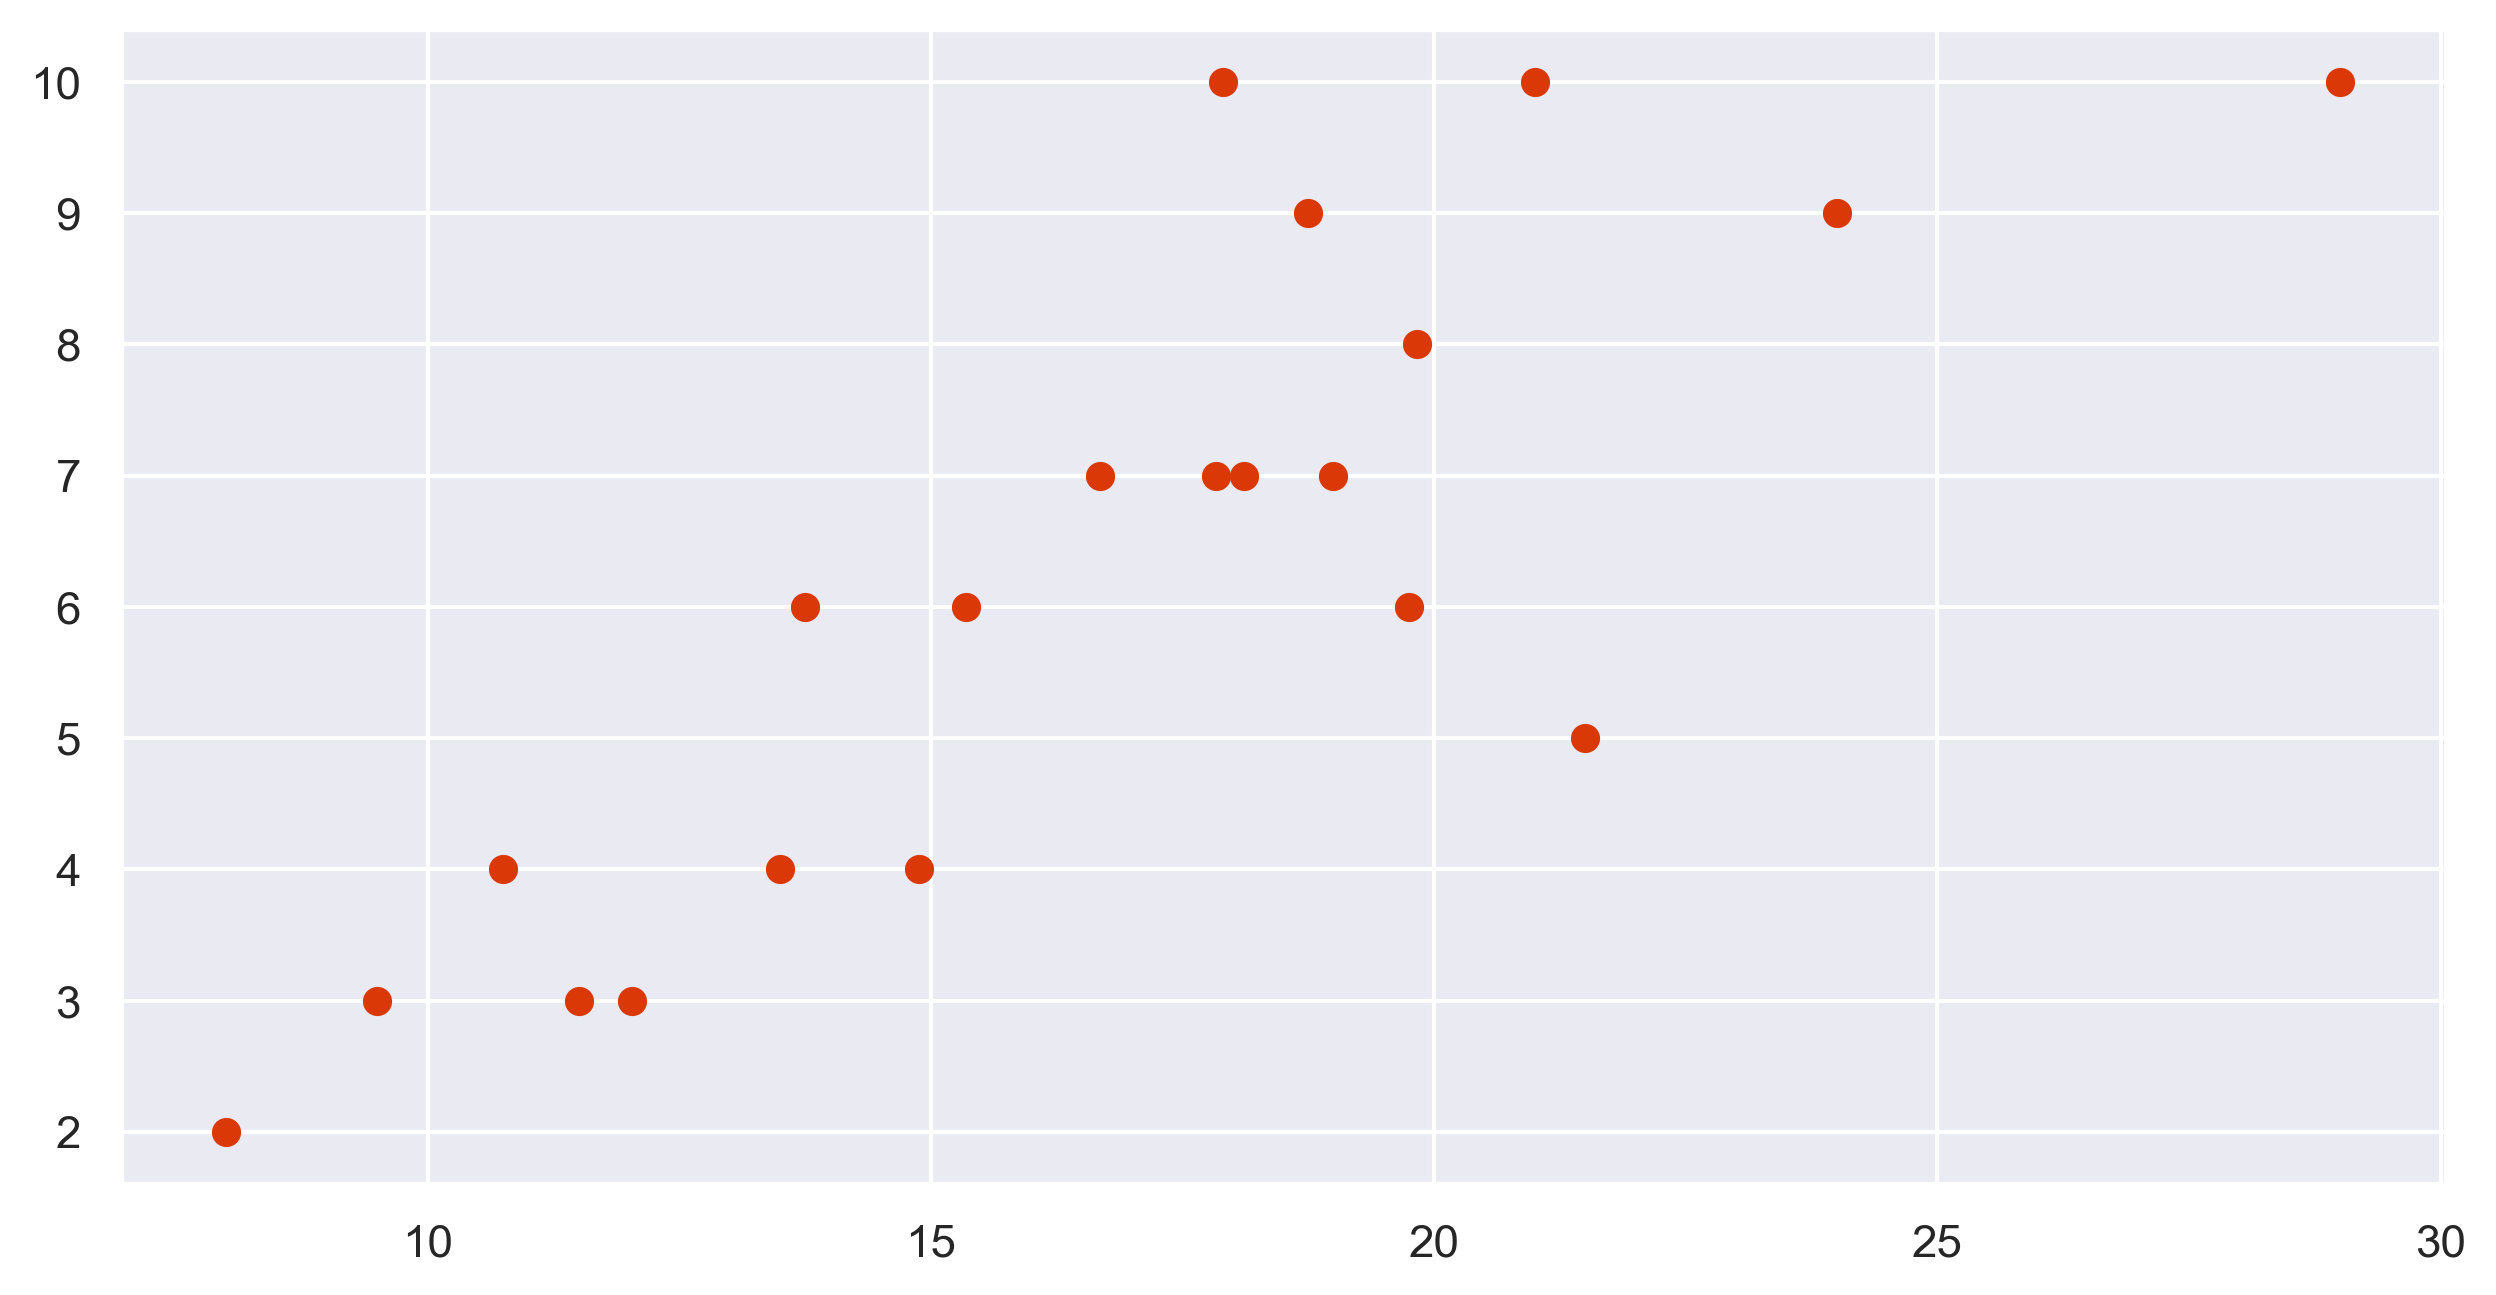

In [8]:
plt.scatter(df['Delivery Time'],df['Sorting Time'])

<Axes: >

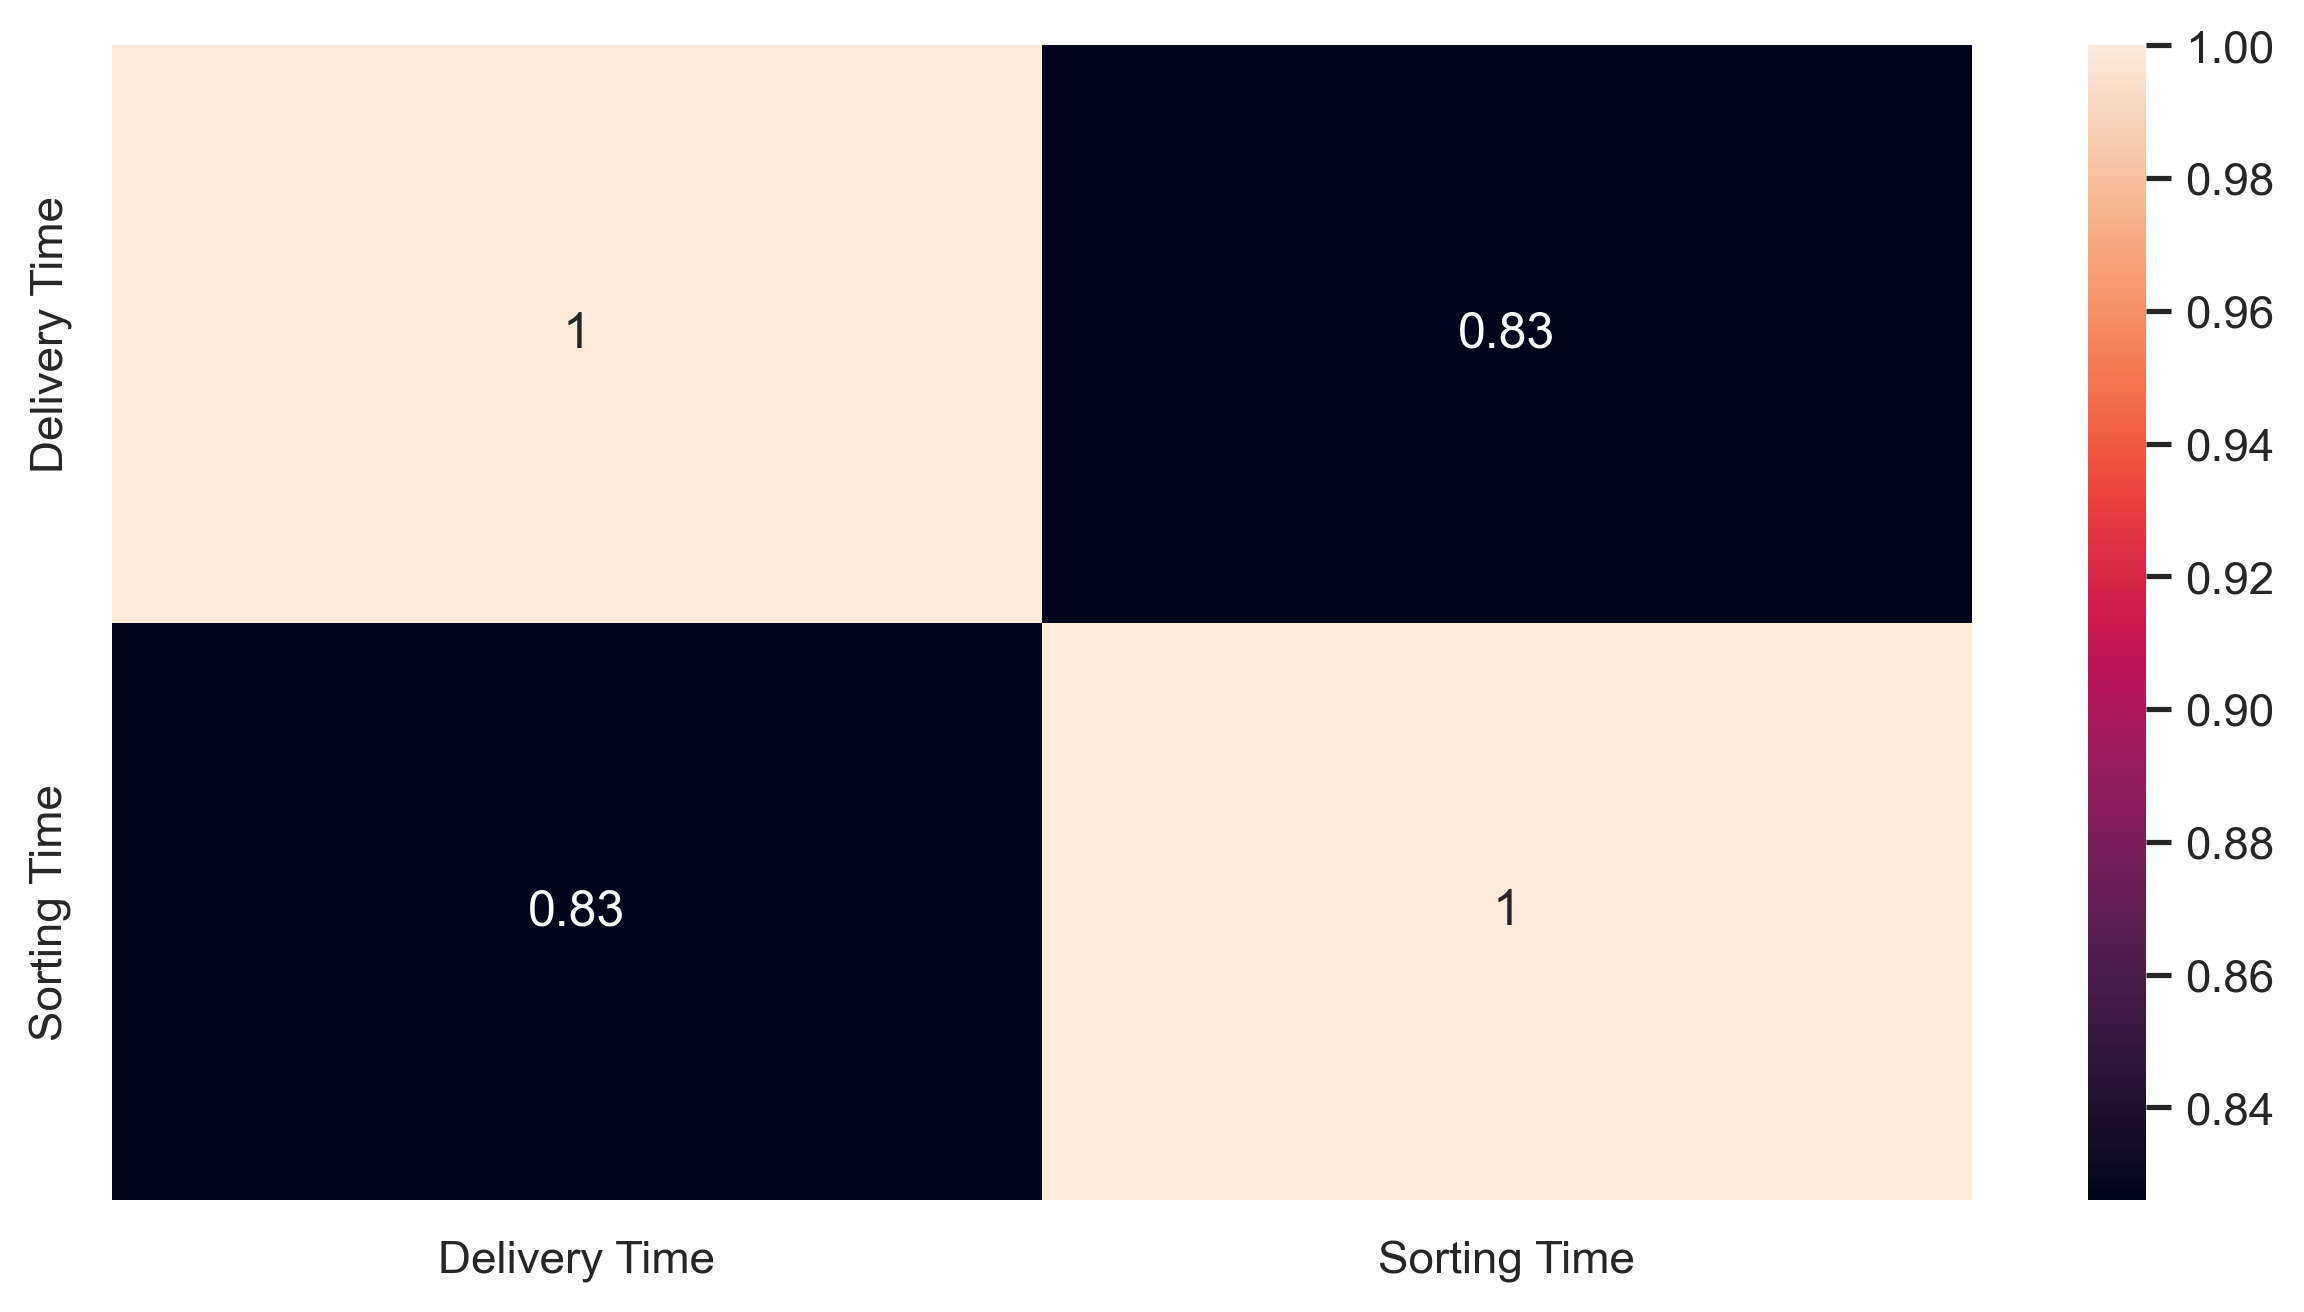

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
x=df[['Sorting Time']]
y=df['Delivery Time']

In [11]:
LR.fit(x,y)

LinearRegression()

In [12]:
LR.intercept_ , LR.coef_

(6.58273397199706, array([1.6490199]))

In [13]:
y_pred=LR.predict(x)

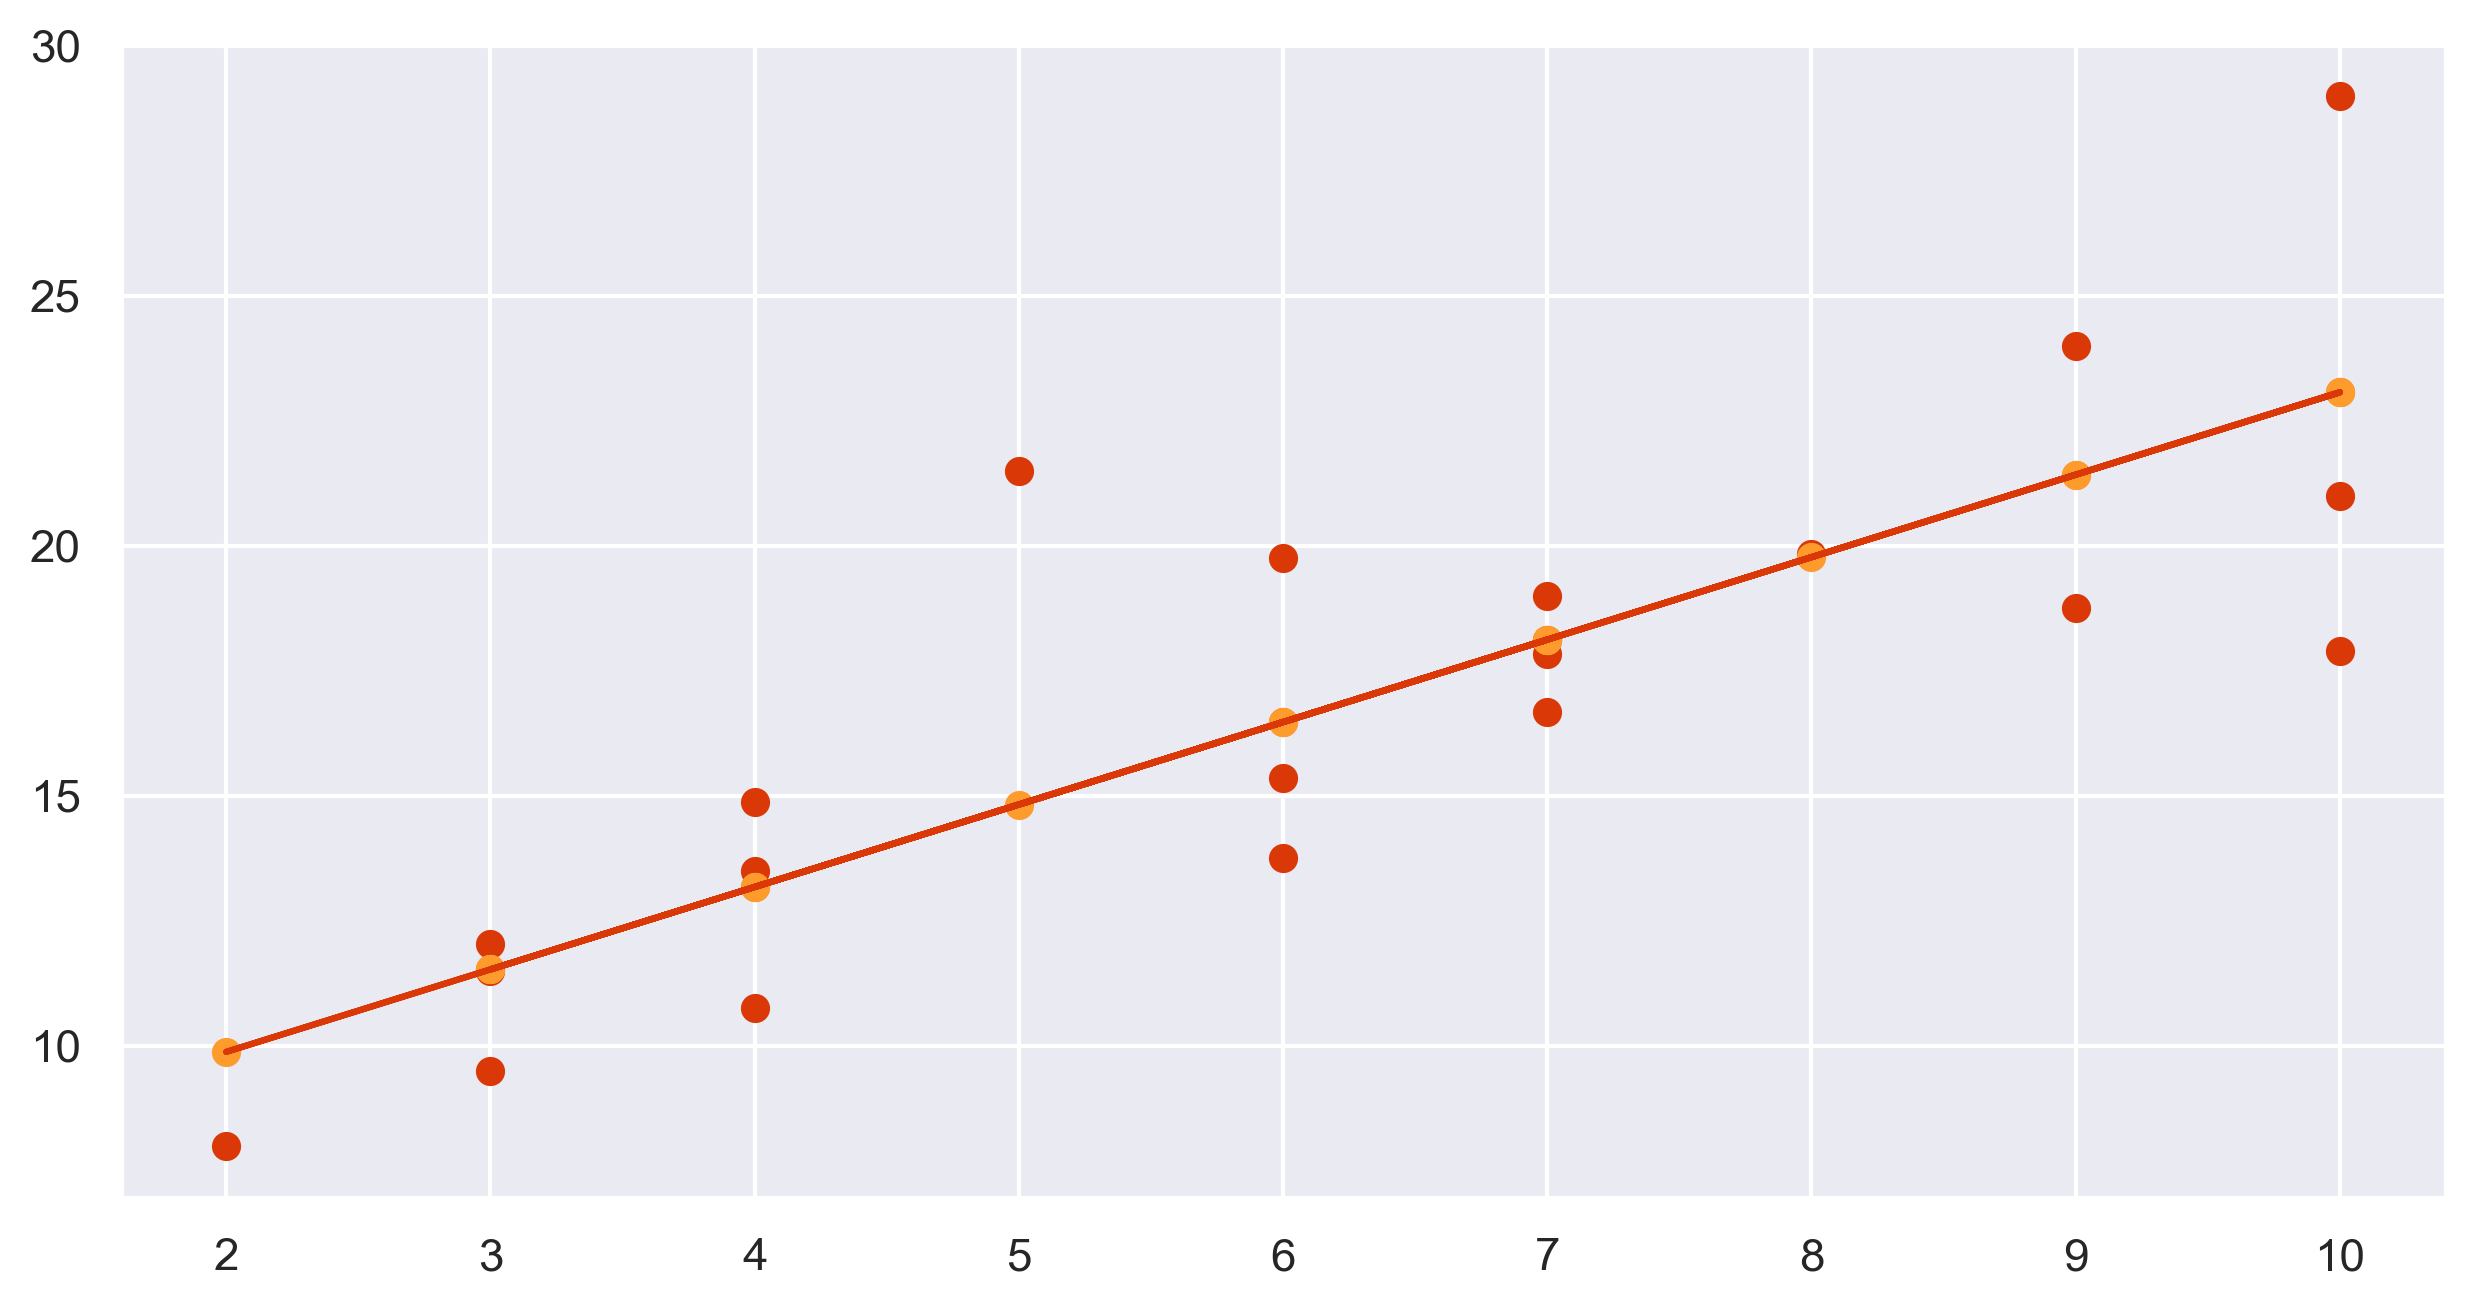

In [14]:
plt.scatter(x,y)
plt.scatter(x,y_pred)
plt.plot(x,y_pred)

In [15]:
mse=mean_squared_error(y,y_pred)
print('Root Mean Square error:',np.sqrt(mse).round(2))

Root Mean Square error: 2.79


In [16]:
r2=r2_score(y,y_pred)
print("R square:",r2.round(2))

R square: 0.68


In [17]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


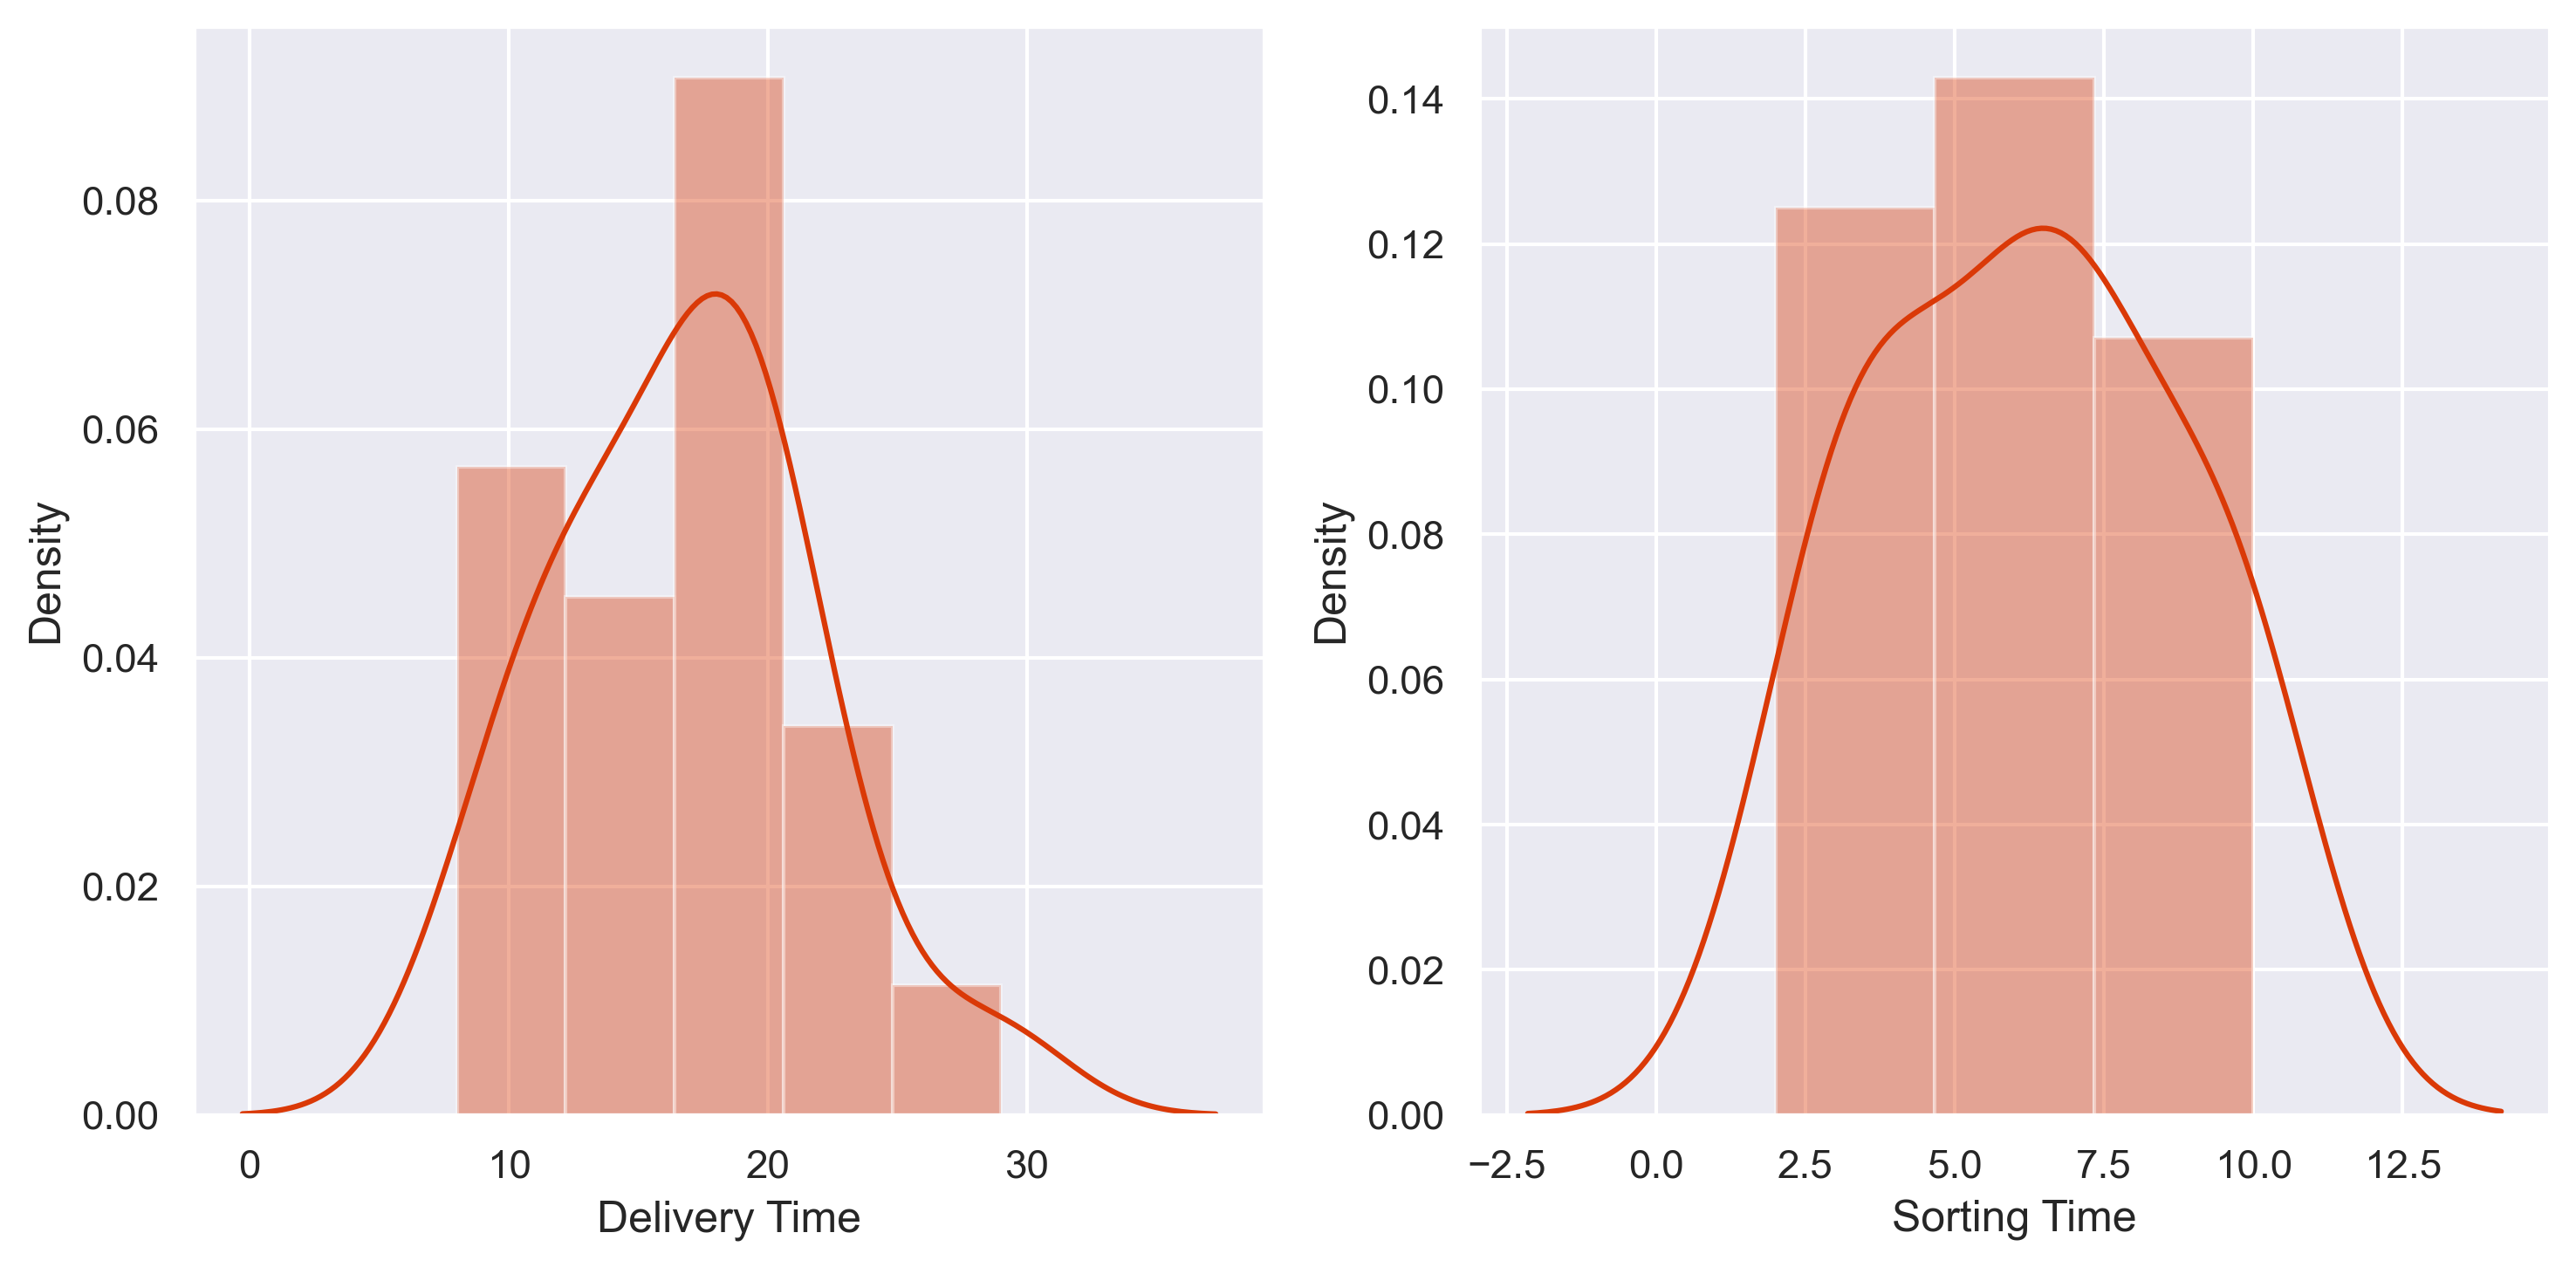

In [18]:
fig,index=plt.subplots(1,2)
sns.distplot(df['Delivery Time'],ax=index[0])
sns.distplot(df['Sorting Time'],ax=index[1])
plt.tight_layout()

# Data Transformation

# 1.Log Transformation

In [19]:
df['Log of Delivery Time']=np.log(df['Delivery Time'])
df['Log of Sorting Time']=np.log(df['Sorting Time'])
df

,Delivery Time,Sorting Time,Log of Delivery Time,Log of Sorting Time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


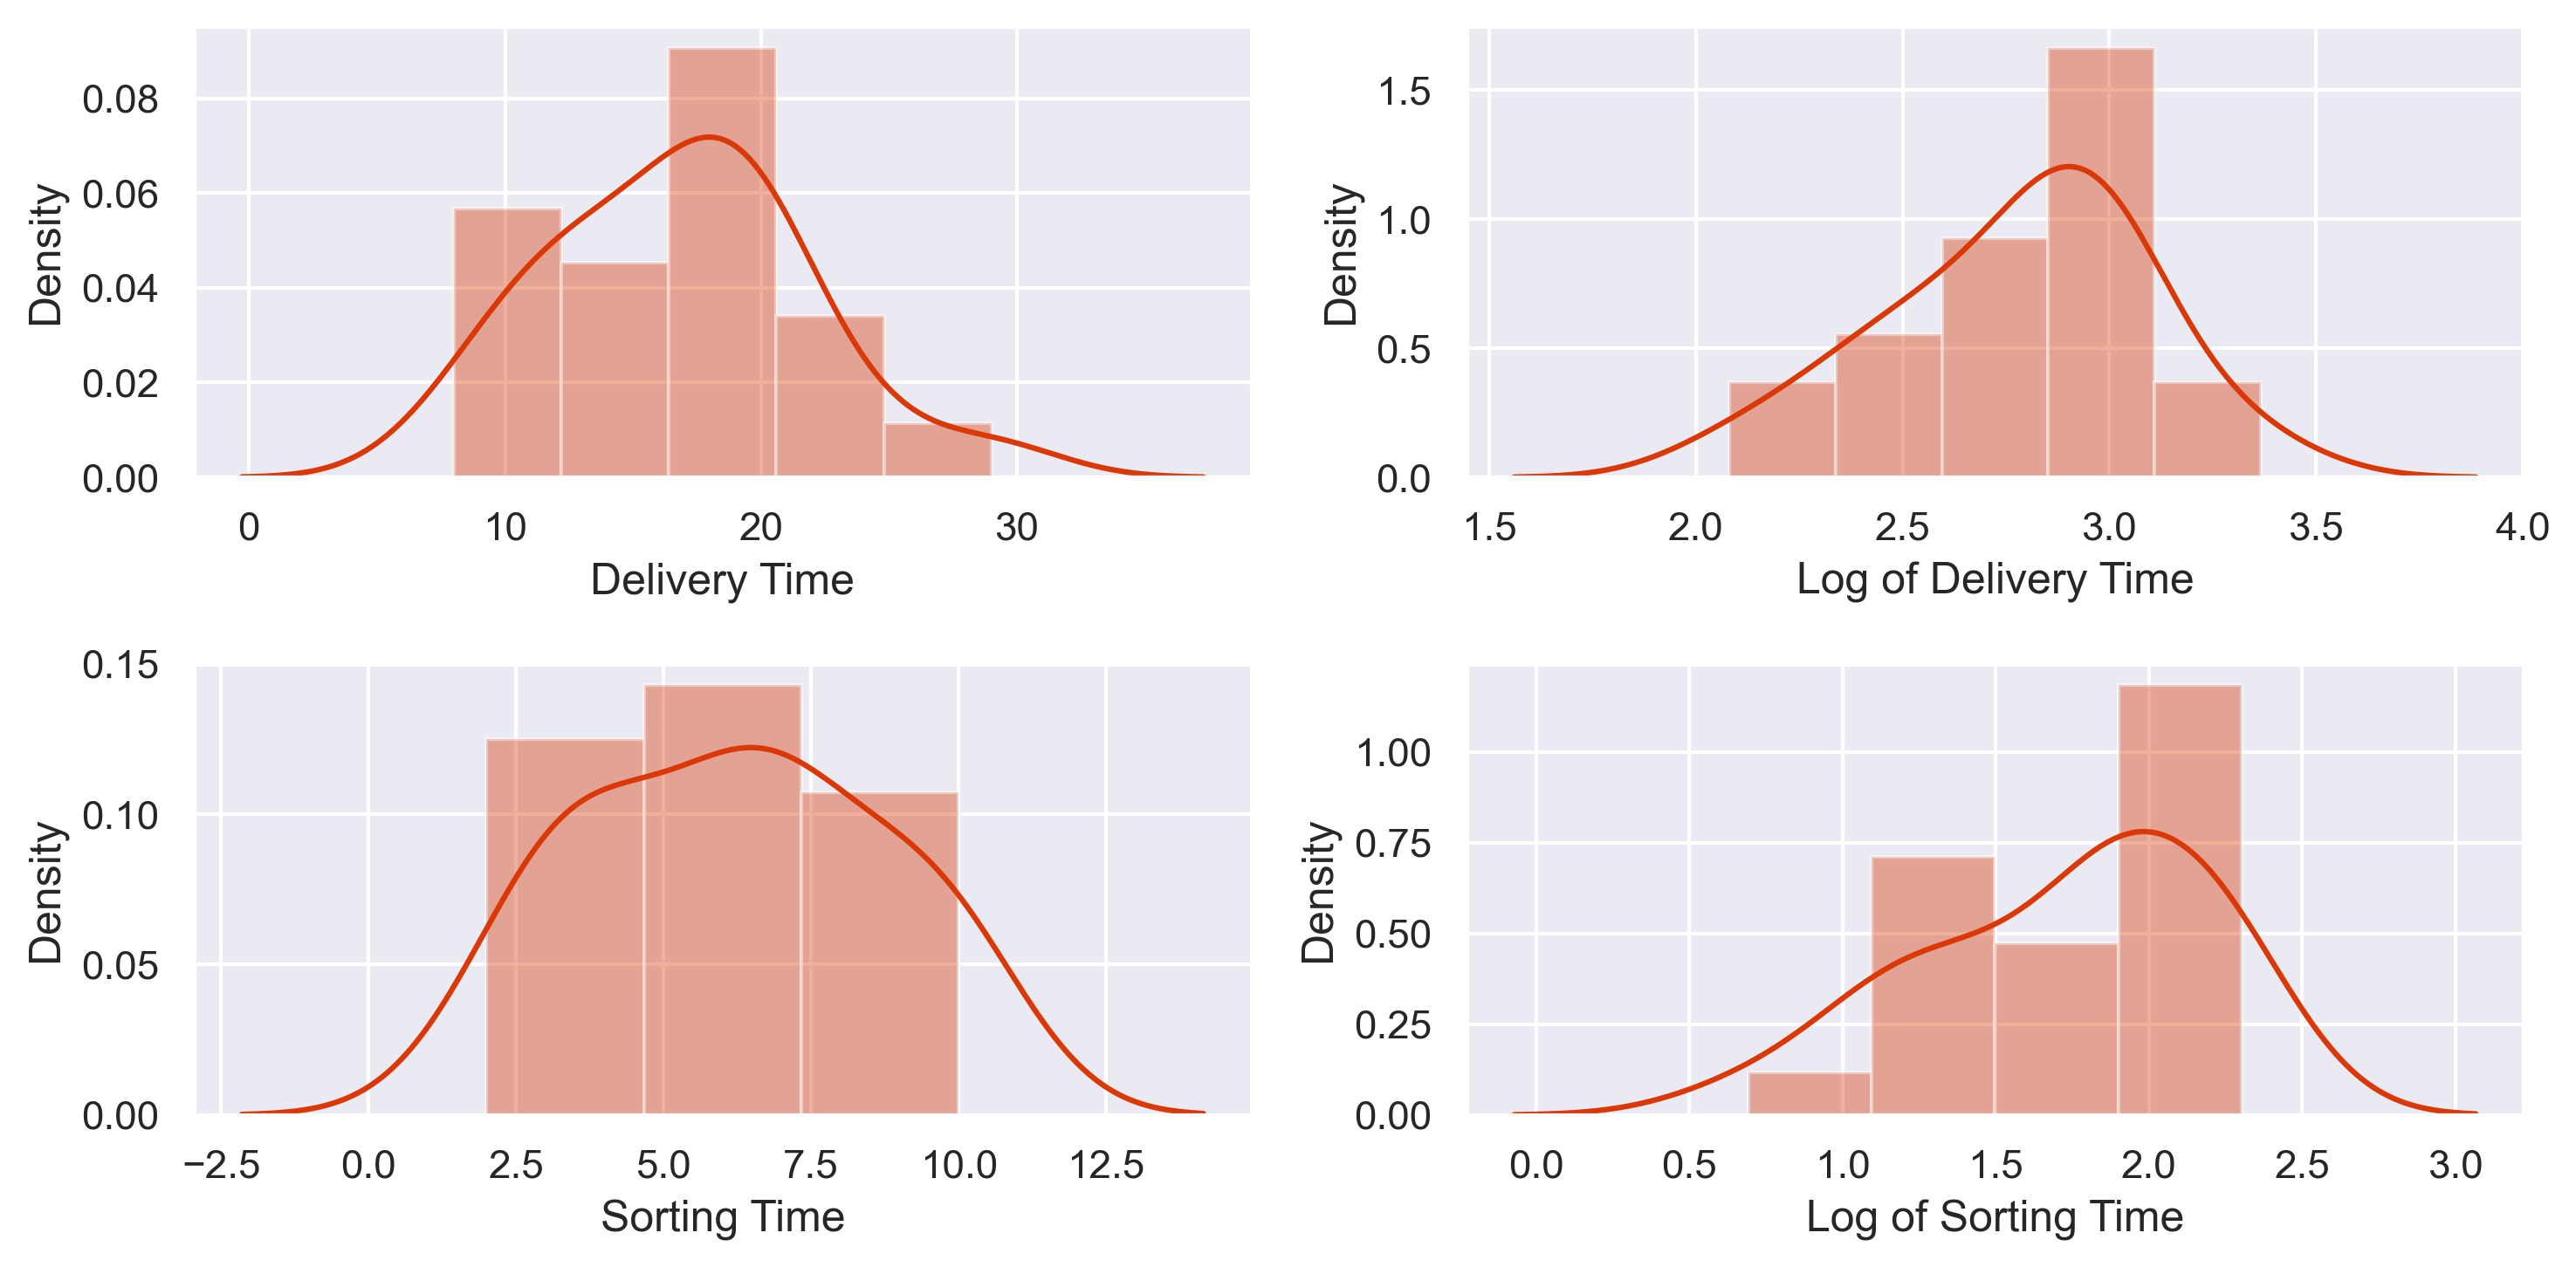

In [20]:
fig,index=plt.subplots(2,2)
sns.distplot(df['Delivery Time'],ax=index[0,0])
sns.distplot(df['Log of Delivery Time'],ax=index[0,1])
sns.distplot(df['Sorting Time'],ax=index[1,0])
sns.distplot(df['Log of Sorting Time'],ax=index[1,1])
plt.tight_layout()

In [21]:
#model fitting after log transformation

In [22]:
LR.fit(df[['Log of Sorting Time']],df[['Log of Delivery Time']])

LinearRegression()

In [23]:
LR.intercept_ , LR.coef_

(array([1.74198709]), array([[0.59752233]]))

In [24]:
log_y_pred=LR.predict(df[['Log of Sorting Time']])

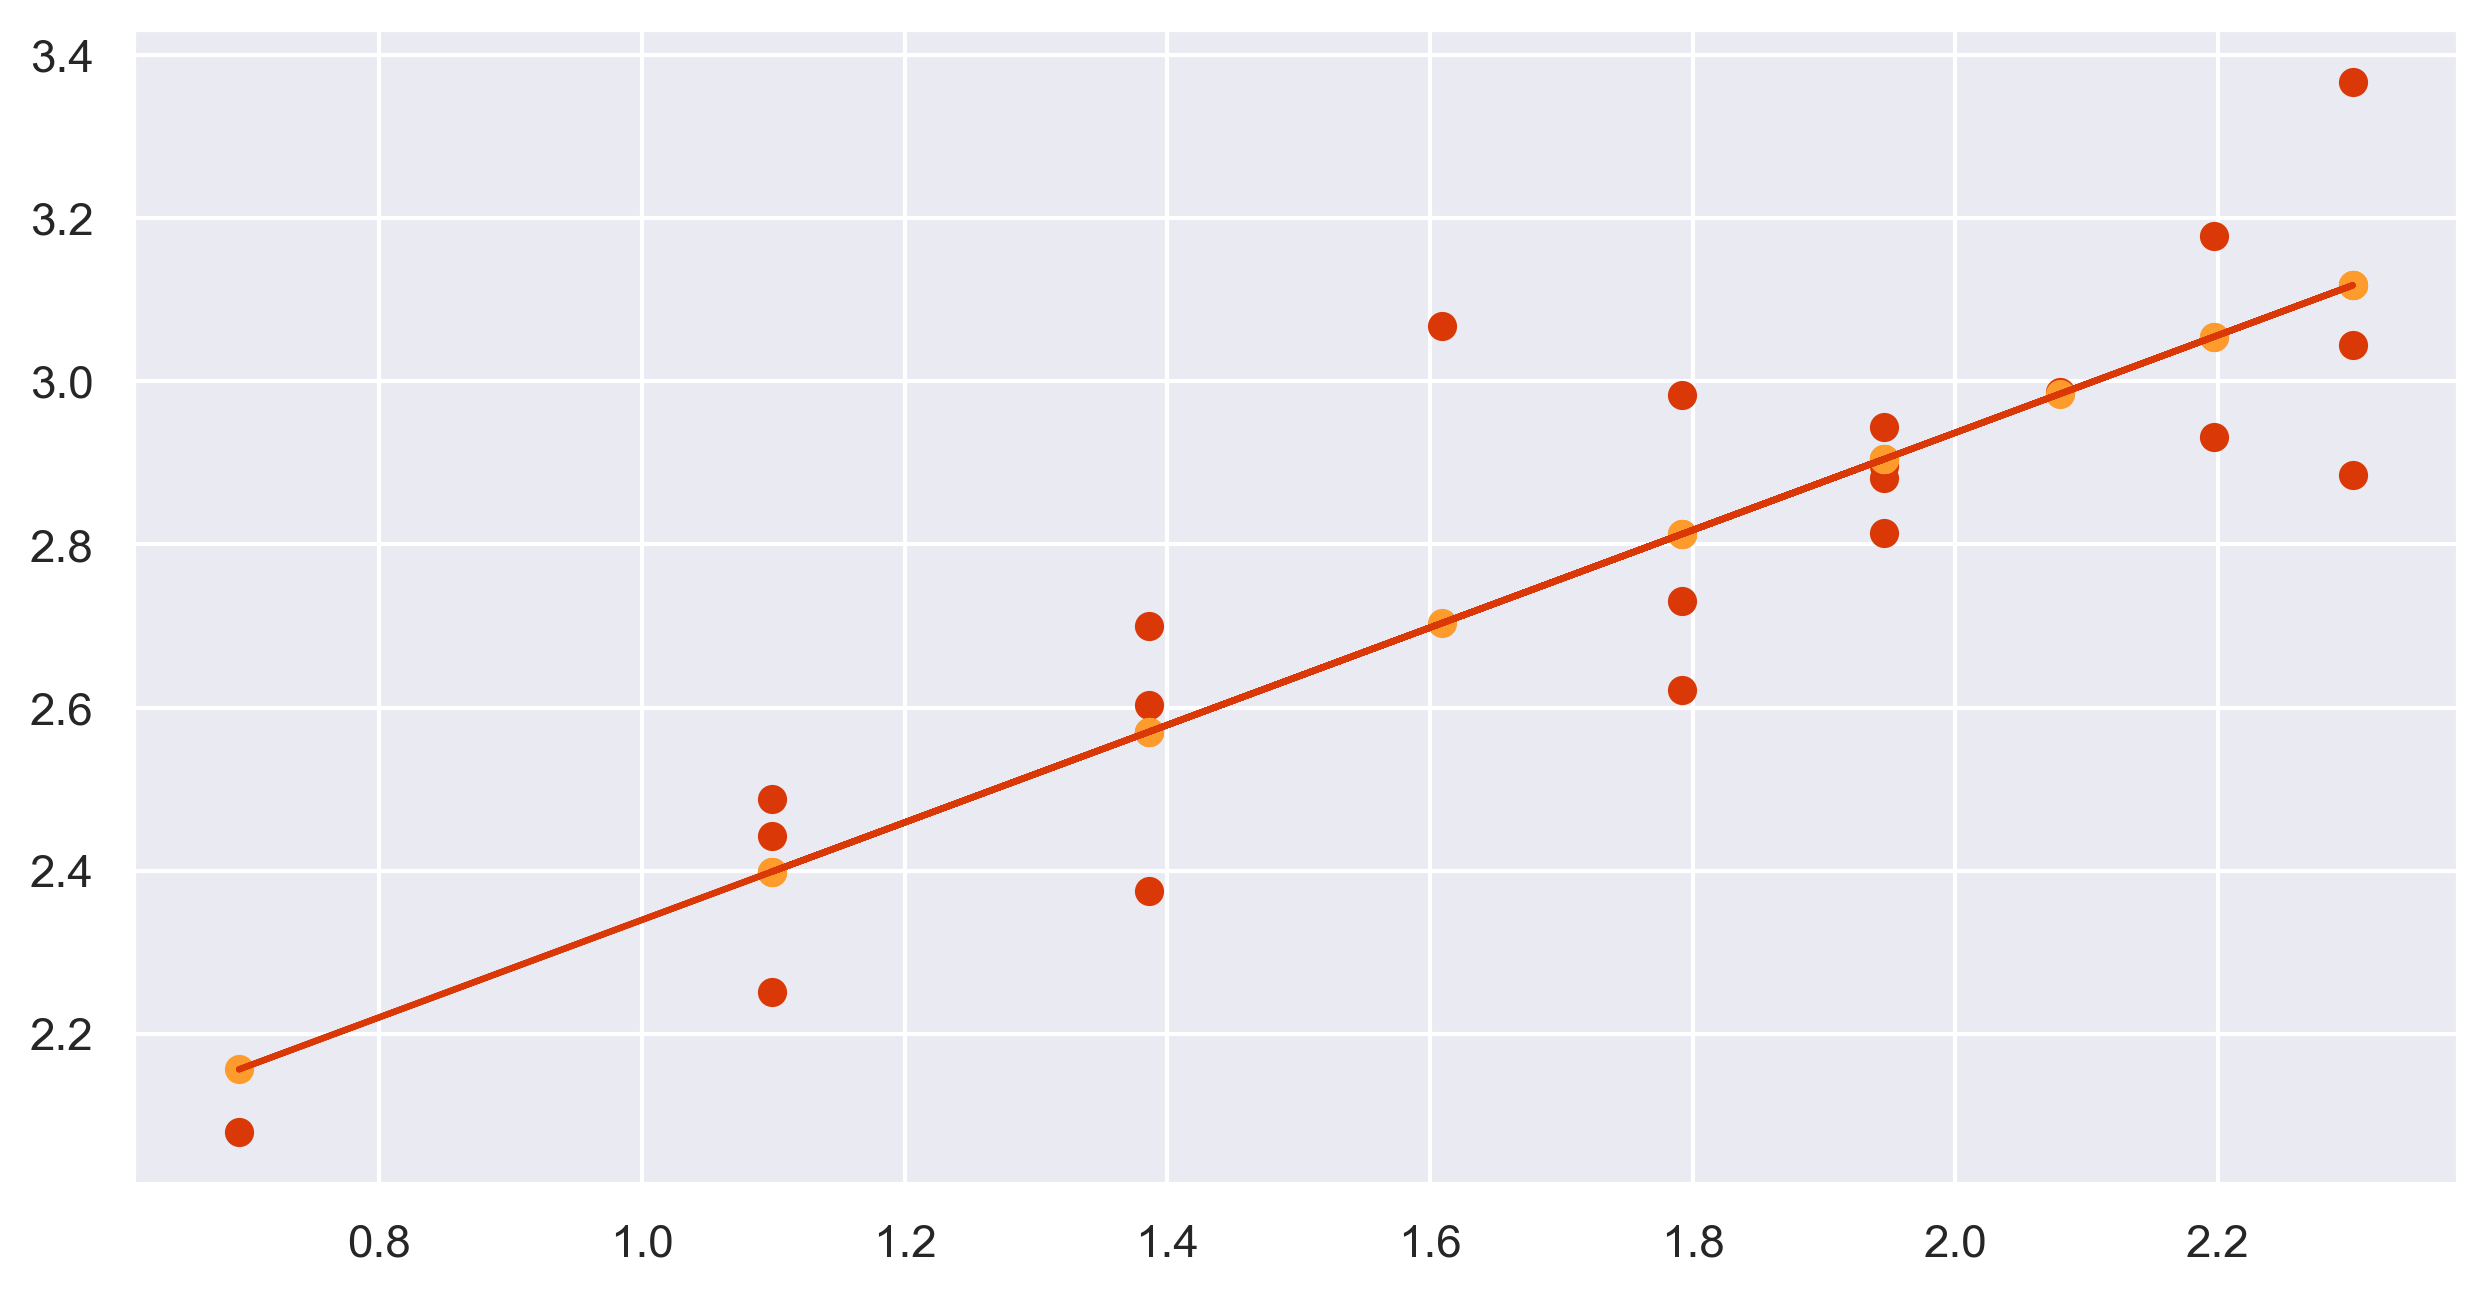

In [25]:
plt.scatter(df[['Log of Sorting Time']],df[['Log of Delivery Time']])
plt.scatter(df[['Log of Sorting Time']],log_y_pred)
plt.plot(df[['Log of Sorting Time']],log_y_pred)

In [26]:
mse=mean_squared_error(df[['Log of Delivery Time']],log_y_pred)
print('Root Mean Square error:',np.sqrt(mse).round(2))

Root Mean Square error: 0.15


In [27]:
r2=r2_score(df[['Log of Delivery Time']],log_y_pred)
print("R square:",r2.round(2))

R square: 0.77


^observe R square seems to improve after log transforamtion

# 2.sqrt Transforamtion

In [28]:
df['sqrt Delivery Time']=np.sqrt(df['Delivery Time'])
df['sqrt Sorting Time']=np.sqrt(df['Sorting Time'])
df

,Delivery Time,Sorting Time,Log of Delivery Time,Log of Sorting Time,sqrt Delivery Time,sqrt Sorting Time
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278
5,15.35,6,2.731115,1.791759,3.917908,2.449490
6,19.00,7,2.944439,1.945910,4.358899,2.645751
7,9.50,3,2.251292,1.098612,3.082207,1.732051
8,17.90,10,2.884801,2.302585,4.230839,3.162278
9,18.75,9,2.931194,2.197225,4.330127,3.000000


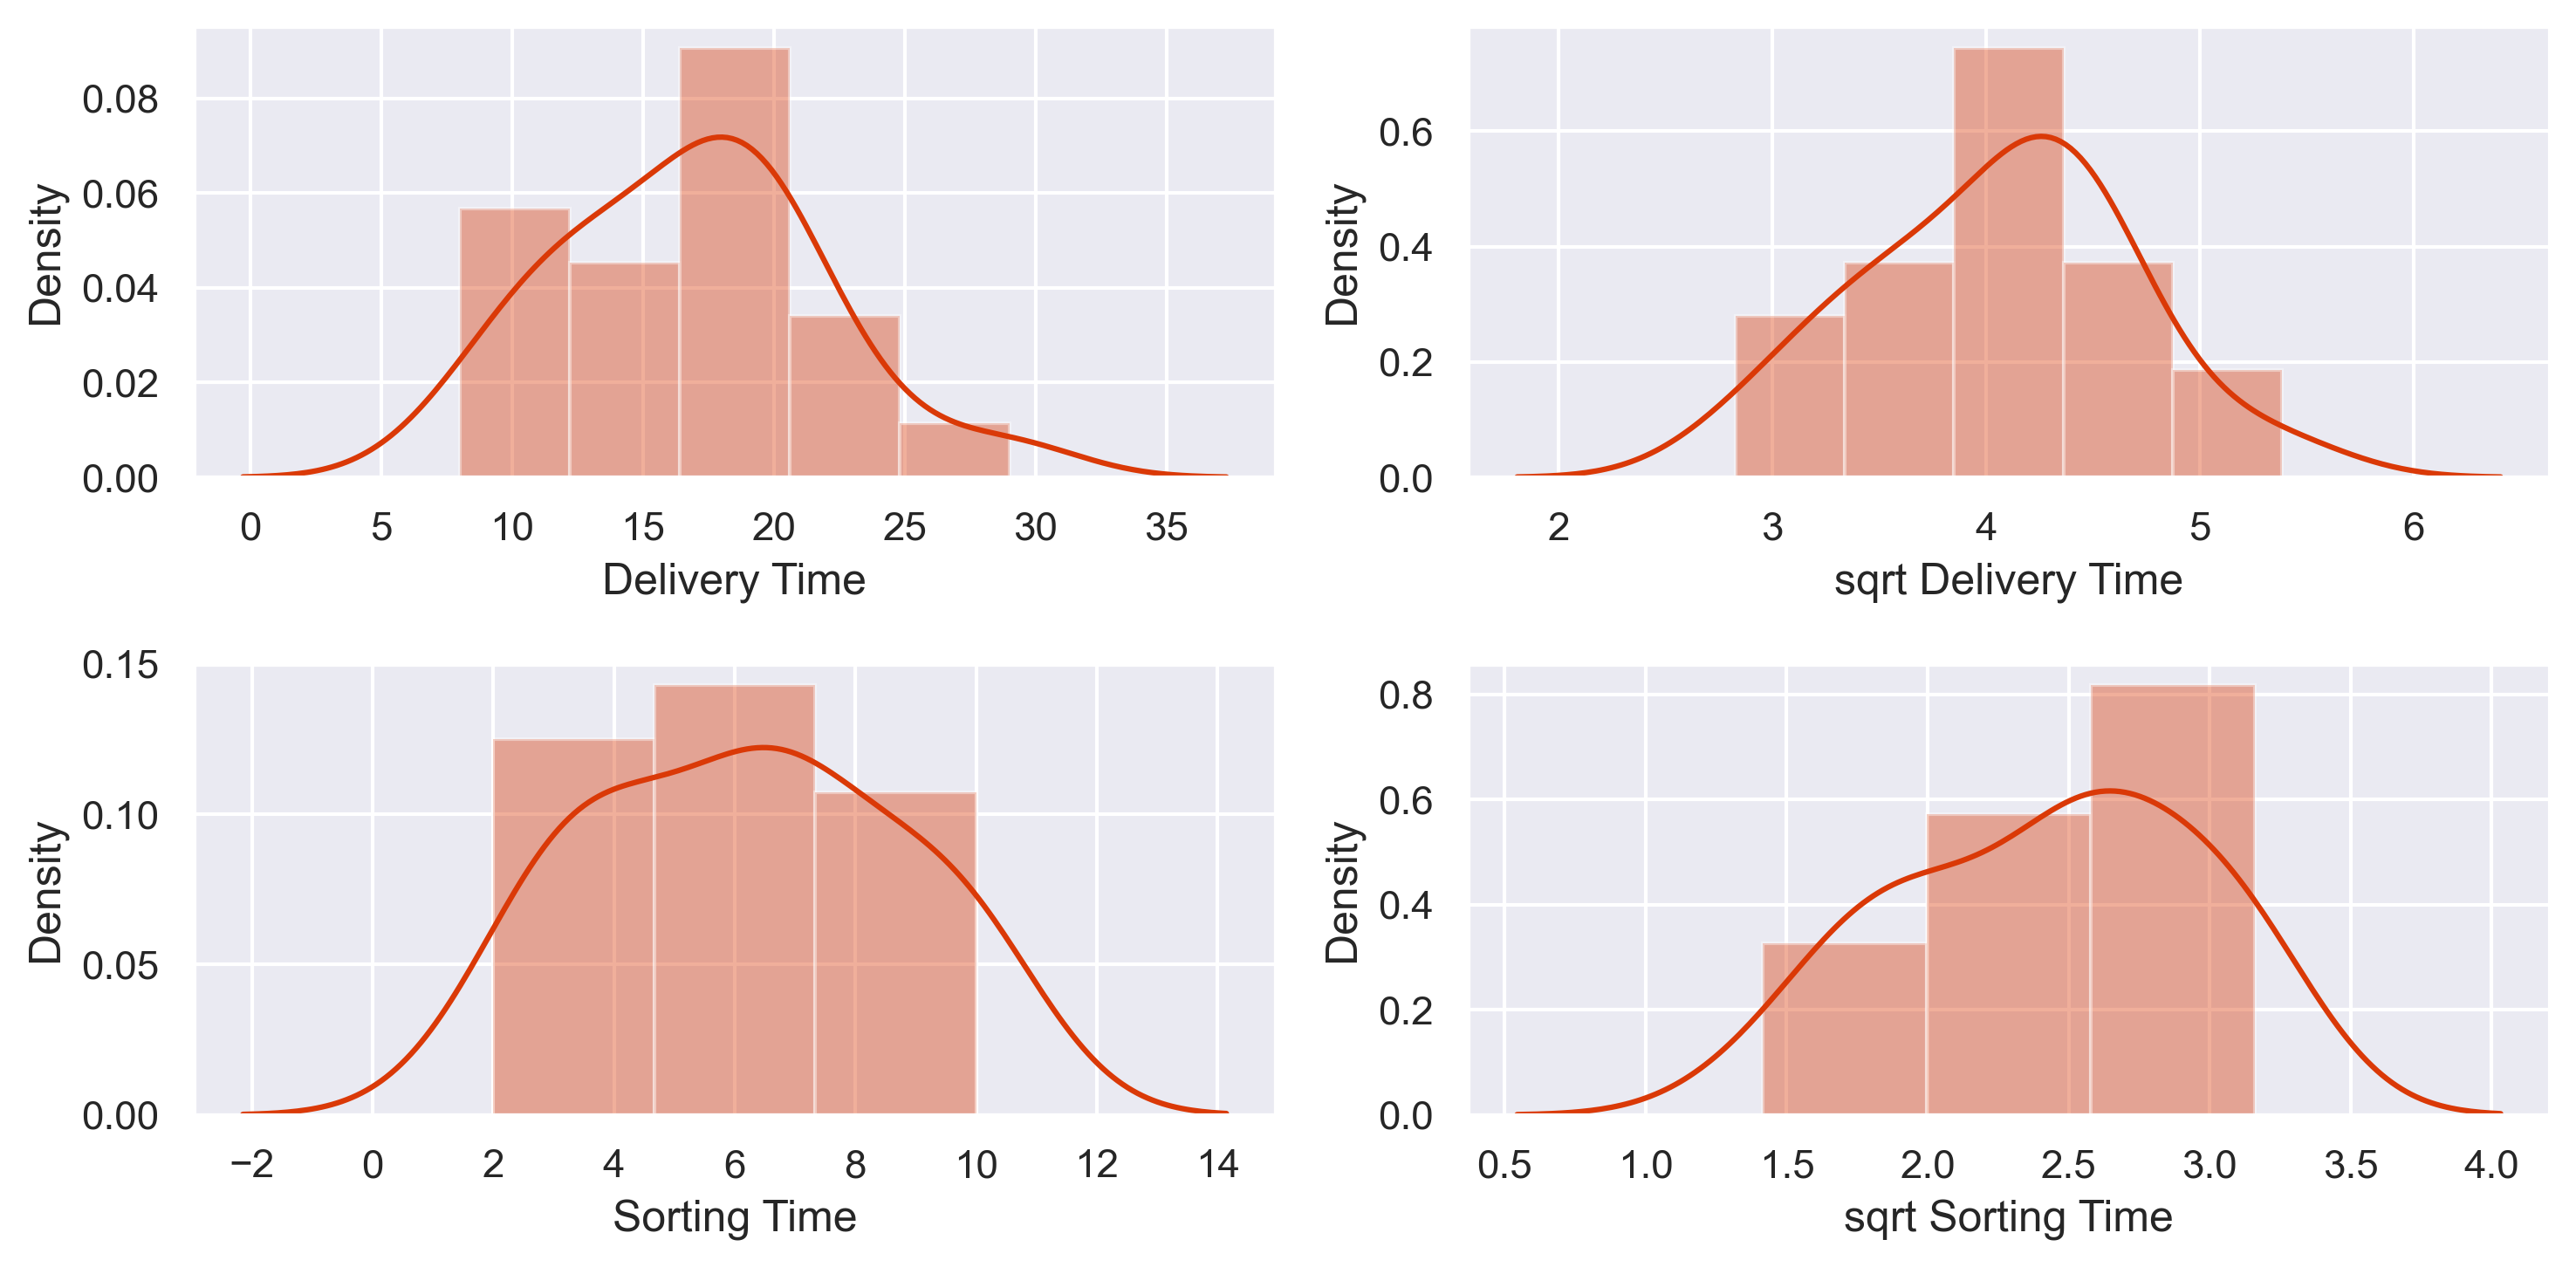

In [29]:
fig,index=plt.subplots(2,2)
sns.distplot(df['Delivery Time'],ax=index[0,0])
sns.distplot(df['sqrt Delivery Time'],ax=index[0,1])
sns.distplot(df['Sorting Time'],ax=index[1,0])
sns.distplot(df['sqrt Sorting Time'],ax=index[1,1])
plt.tight_layout()

In [30]:
#model fitting after sqrt transformation

In [31]:
LR.fit(df[['sqrt Sorting Time']],df[['sqrt Delivery Time']])

LinearRegression()

In [32]:
LR.intercept_ , LR.coef_

(array([1.61347867]), array([[1.00221688]]))

In [33]:
sqrt_y_pred=LR.predict(df[['sqrt Sorting Time']])

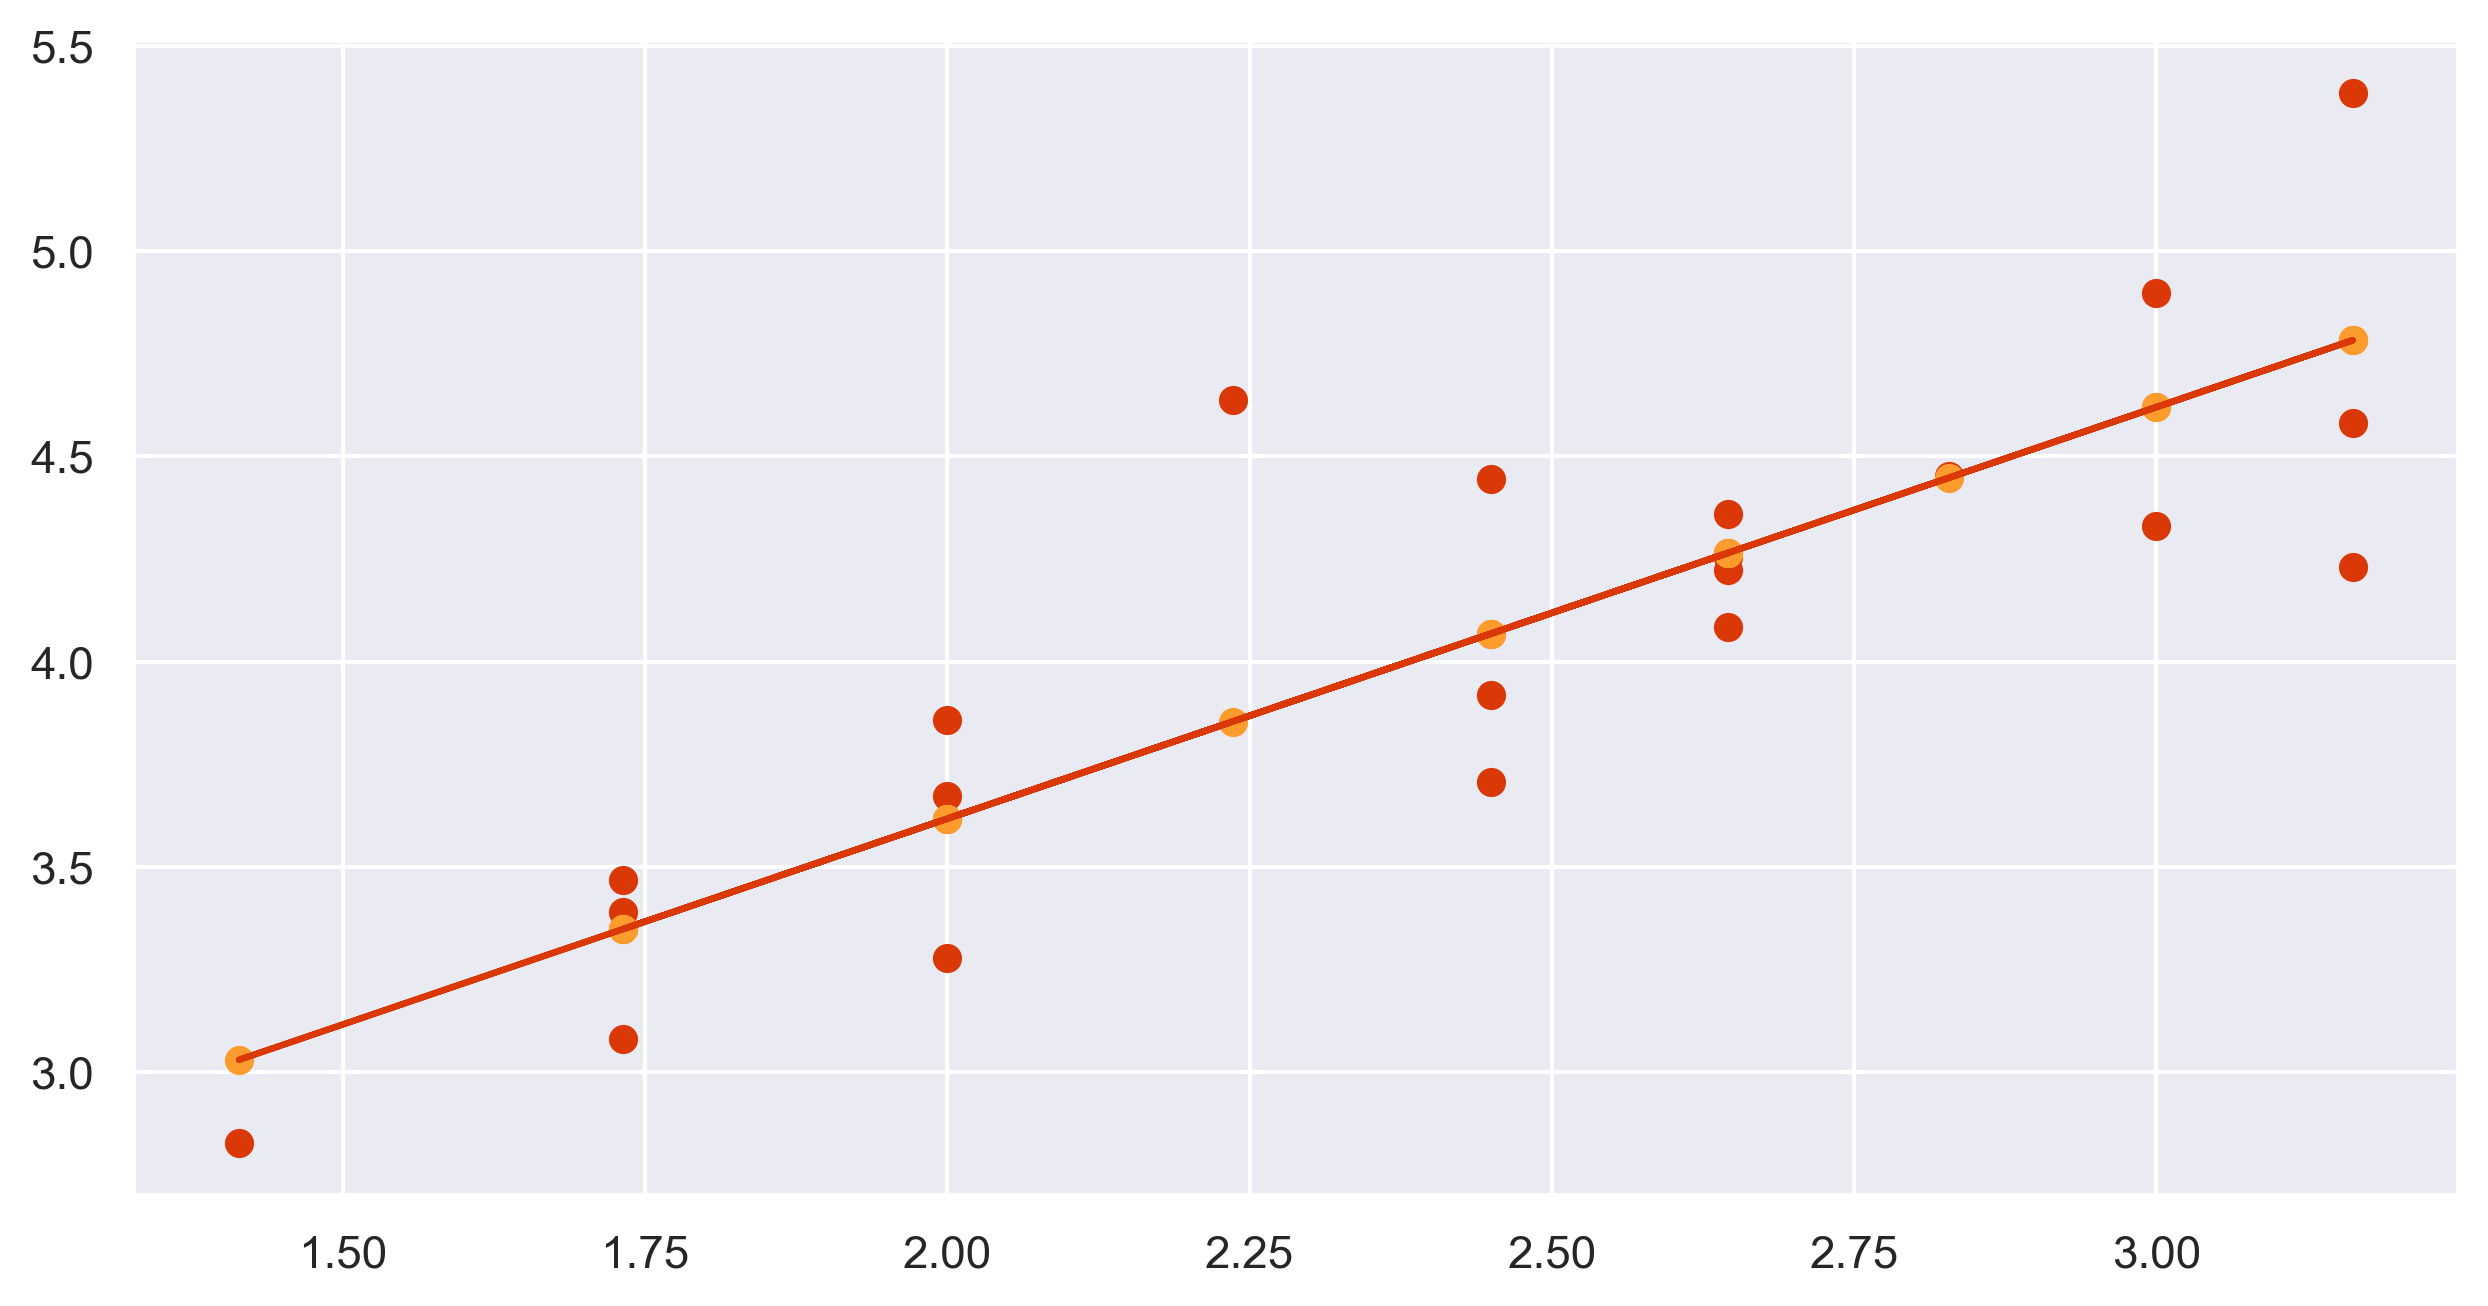

In [34]:
plt.scatter(df[['sqrt Sorting Time']],df[['sqrt Delivery Time']])
plt.scatter(df[['sqrt Sorting Time']],sqrt_y_pred)
plt.plot(df[['sqrt Sorting Time']],sqrt_y_pred)

In [35]:
mse=mean_squared_error(df[['sqrt Delivery Time']],sqrt_y_pred)
print('Root Mean Square error:',np.sqrt(mse).round(2))

Root Mean Square error: 0.32


In [36]:
r2=r2_score(df[['sqrt Delivery Time']],sqrt_y_pred)
print("R square:",r2.round(2))

R square: 0.73


^observe R square value after sqrt tansforamation has imporved from raw data,
but R square value of sqrt is less than R square value of log transforamation

- after observation for this data doing log transformation and building model on that gives us better R square value=77%